# COGS 108 - Final Project 
# Effect of Education Attainment on Lowering Poverty Rates

# Overview

The goal of our project was to determine whether there is a correlation between the education level and the poverty rate in the United States. We analyzed high school attendance data and the poverty by region data from United States Census Bureau from 1959 to 2019. After performing a linear regression test and EDA, we were not able to find a significant correlation between education level and poverty rates. However, it is important to note the fact that many confounding variables were not included in our consideration. If we have a cleaner dataset without those confounding variables, it is possible to lead to a different outcome. 

# Names

- Shan Mo
- Sherry Zeng
- Tianqi Xia
- Jingxi Chen

<a id='research_question'></a>
# Research Question

To what extend does high school education attainment play a role in the lowering of poverty rates in the United States?

<a id='background'></a>

## Background & Prior Work

As of 2021, the COVID-19 pandemic has resulted in the skyrocketing of unemployment, the rise of poverty, and a steady increase in economic inequality. However, poverty has not been a recent issue that emerged from the pandemic--- it has been an issue that world leaders are trying to find a solution to for decades. People living in extreme poverty, as defined by the World Bank, are those that live on 1.90 USD per day, while those that live on between 1.0 USD and 3.10 USD per day belong in the moderate poor class. In 2019, about 14.4% of underaged Americans, 9.4% aged 18-64, 8.9% of those over 64, and 10.5% of all Americans live in poverty. The education attainment rate we will be focusing on is the completion of a high school degree or higher. In 2019, about 90.1% of Americans aged 25 or older have a high school degree and 36.0% have a bachelor's degree or higher. 

In creating the formula for eradicating poverty, education is often seen playing a big role. Previous studies have shown a correlation between education and poverty; countries with a larger proportion of the population living in poverty tend to have lower mean years in schooling. Moreover, in the United States, families with parents having a higher degree in school are shown to be less likely to live in poverty households. This trend is also only seen in countries with lower GDP growth, such as Pakistan, where an increase in educational achievements is linked with a lower possibility of poverty. 


References:
- 1)https://ourworldindata.org/extreme-poverty
- 2)https://nces.ed.gov/programs/coe/indicator_cce.asp
- 3)https://www.researchgate.net/publication/215442733_Impact_of_education_on_poverty_reduction

# Hypothesis


Based on the findings of previous studies and unconfirmed claims, we hypothesize that a higher rate of high school education attainment will result in a lower poverty rate in the United States. 


# Dataset(s)


- Percent of People 25 Years and Over Who Have Completed High School or College: Selected Years 1940 to 2019
- https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html
- 63 sets of observations
- Documented by the United States Census Bureau, this data table shows the percentage of Americans 25 years and over who has completed a high school degree or higher. Although the table includes data from 1940, some records for several earlier years are missing. 


- Poverty of People by Reigion
- https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-poverty-people/hstpov9.xlsx
- 55 sets of observations
- Also taken from the United States Census Bureau, this table shows the number and percentage of people living in povery from 1959 to 2019 with regard to regions. The statistics for the total polulation are also included. It organizes the data by year. There are no missing data from this dataset. 


# Setup

In [2]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm
from scipy.stats import pearsonr


# Data Cleaning

For the two datasets, we found on the United States Census Bureau official website, there were invalid data contained in the first few rows. Also, the high school attendance dataset contained data from 1940 to 1958, which were not included in the poverty rate dataset. Thus, we need to exclude these data in order to perform a consistent correlation test. 

We cleaned the high school attendence dataset first.

In [3]:
ed_data = pd.read_csv('https://raw.githubusercontent.com/COGS108/group085_wi21/main/education-attainment.csv?token=ASNGQOAMJ4WS5BYMM6GPTFTAKSQDY')
print(ed_data.shape)
ed_data.head()

#read in the raw csv file of education attainment rates 

(284, 34)


,Table with row headers in column A and column headers in rows 5 through 6.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Table A-2. Percent of People 25 Years and Ov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Noninstitutionalized population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Age and year,NaN,NaN,All races,NaN,NaN,White,NaN,NaN,Non-Hispanic White,...,Non-Hispanic White alone or in combination,NaN,NaN,Black alone or in combination,NaN,NaN,Asian alone or in combination,NaN,NaN,NaN
4,NaN,NaN,NaN,Total,Male,Female,Total,Male,Female,Total,...,Total,Male,Female,Total,Male,Female,Total,Male,Female,NaN


We see that the dataset is organized by race, gender, and different education attainment degrees. However, since we only want to focus on all Americans who are 25 years of age with at least a high school degree, we will be dropping the other columns containing data we do not need. Also, the column names of the data subset will also be renamed so they are informative. 

In [4]:
#these rows contain data for those who are 25 years old or above with at least four years of high school education. 
ed_data = ed_data[9:71]

#these columns are the year and the corresponding percentage of educational attainment for the entire population 
ed_data = ed_data.iloc[:, 2:4]

#renaming the columns for a better idea of what they store 
ed_data = ed_data.rename(columns = {'Unnamed: 2':'Year',
                           'Unnamed: 3':'High school degree attainment'
                            })
#reseting the index 
ed_data.reset_index(drop=True, inplace=True)

ed_data.head(10)


,Year,High school degree attainment
0,2019,90.1
1,2018,89.8
2,2017,89.6
3,2016,89.1
4,2015,88.4
5,2014,88.3
6,2013,88.2
7,2012 1,87.6
8,2011,87.6
9,2010,87.1


Now we have the subset of data that we want. The first column is the year in which the data is describing and the second column is the percentage of people with at least four years of high school. Since we want to graph and analyze the data, they must be in numerical format. 

In [5]:
#check the type of data in dataframe 
ed_data.dtypes

Year                             object
High school degree attainment    object
dtype: object

Since percentage of high school degree attainment is in decimal form, it will be converted to a float type object. 

In [6]:
#convert string to float
ed_data['High school degree attainment'] = pd.to_numeric(ed_data['High school degree attainment'])
ed_data.head()

,Year,High school degree attainment
0,2019,90.1
1,2018,89.8
2,2017,89.6
3,2016,89.1
4,2015,88.4


Some of the data for the year number is followed by a footnote number with a space in between them. To only return a numerical type of the year number, the space and the footnote number will be remove. First, the specific data with footnote numbers is identified and then manipulated. 


In [7]:
#check which data has more than four digits and remove the footnote annotation by replacing and slicing 
for item in ed_data['Year']:
    if len(item)>4:
        year = item[0:4]
        ed_data = ed_data.replace([item],year)
    else:
        continue
        
ed_data['Year'] = pd.to_numeric(ed_data['Year'])

Now, the type of the two data will both be in numerical format; Year is a interger type and high school degree is a float type. 

In [8]:
print(ed_data.dtypes)
ed_data.head(10)

Year                               int64
High school degree attainment    float64
dtype: object


,Year,High school degree attainment
0,2019,90.1
1,2018,89.8
2,2017,89.6
3,2016,89.1
4,2015,88.4
5,2014,88.3
6,2013,88.2
7,2012,87.6
8,2011,87.6
9,2010,87.1


The process described above will be applied to the dataset for poverty rates dataset as well. 

In [9]:
# read in the raw csv file of poverty rates
pov_data = pd.read_csv("https://raw.githubusercontent.com/COGS108/group085_wi21/main/hstpov9.csv?token=ASNGQOGCXYEFFDAV7PWFTHDAKSQUO")
pov_data.head()
    

,Table with row headers in column A and column headers in rows 4 through 6,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Table 9. Poverty of People by Region: 1959 to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Population in thousands. Population as of Mar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Total,NaN,NaN,Northeast,NaN,NaN,Midwest,NaN,NaN,South,NaN,NaN,West,NaN,NaN
3,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN
4,NaN,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent


In [10]:
# Although the origianl data also includes data with regards to regions, we will be focusing on the population statistics only.
# Excludes the unwanted rows
pov_data = pov_data[5 : 60]

# Filter out the columns of the Year and the corresponding poverty data
pov_data = pov_data.iloc[:, [0,3]]

# Rename the columns with readable names
pov_data = pov_data.rename(columns = {"Table with row headers in column A and column headers in rows 4 through 6" : "Year", 
                                "Unnamed: 3" : "Percentage of Poverty"})

# Reset index for further steps
pov_data.reset_index(drop=True, inplace=True)

pov_data.head()

,Year,Percentage of Poverty
0,2019,10.5
1,2018,11.8
2,2017 (21),12.3
3,2017,12.3
4,2016,12.7


In [11]:
pov_data.dtypes

Year                     object
Percentage of Poverty    object
dtype: object

In [12]:
#transform Percentage of Poverty to numerical format
pov_data['Percentage of Poverty'] = pd.to_numeric(pov_data['Percentage of Poverty'])

#check which data has more than four digits and remove the footnote annotation by replacing and slicing 
for item in pov_data['Year']:
    if len(item)>4:
        year = item[0:4]
        pov_data = pov_data.replace([item],year)

    else:
        continue
        
pov_data['Year'] = pd.to_numeric(pov_data['Year'])

#check element types again
pov_data.dtypes




Year                       int64
Percentage of Poverty    float64
dtype: object

In [13]:
pov_data.head()

,Year,Percentage of Poverty
0,2019,10.5
1,2018,11.8
2,2017,12.3
3,2017,12.3
4,2016,12.7


In [14]:
#check for missing values
print(ed_data.isnull().sum())
print(pov_data.isnull().sum())

Year                             0
High school degree attainment    0
dtype: int64
Year                     0
Percentage of Poverty    0
dtype: int64


There are no missing datas from the subset that we have extracted. 

# Data Analysis & Results 

## Descriptive Analysis 
Before analyzation, lets get a better idea of what each dataset looks like. 

In [15]:
#shape and descriptive information of education dataset
print(ed_data.shape)
ed_data.describe()

(62, 2)


,Year,High school degree attainment
count,62.000000,62.000000
mean,1987.919355,71.550000
std,19.083336,16.083835
min,1947.000000,33.100000
25%,1973.250000,60.150000
50%,1988.500000,76.550000
75%,2003.750000,85.050000
max,2019.000000,90.100000


In [16]:
#shape and descriptive information of poverty dataset
print(pov_data.shape)
pov_data.describe()

(55, 2)


,Year,Percentage of Poverty
count,55.000000,55.000000
mean,1993.509091,13.421818
std,16.277538,2.137036
min,1959.000000,10.500000
25%,1980.500000,12.200000
50%,1994.000000,13.000000
75%,2007.500000,14.350000
max,2019.000000,22.400000


The mean percentage of high school degree attainment is 70.49% and the mean percentage of poverty is 13%. However, the record for education attainment starts from 1940 and 1959 for poverty percentage. Before merging the two datasets, let's take a look at the general trend of the records.  

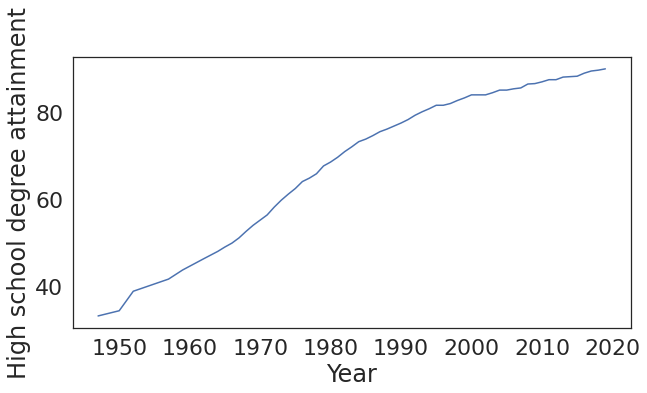

In [17]:
#plot a line graph of the general trend of education attainment percentage
sns.lineplot(x='Year', y='High school degree attainment', data=ed_data)

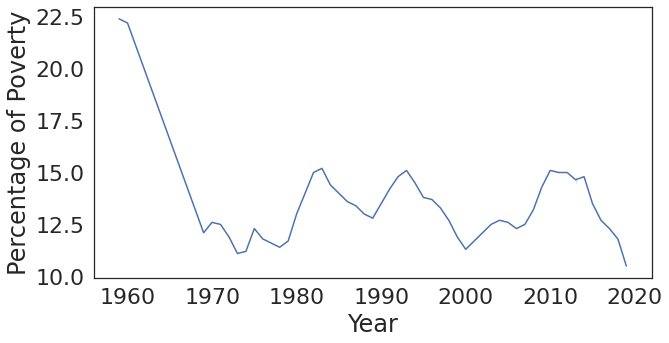

In [18]:
#plot a line graph of the general trend of poverty percentage
sns.lineplot(x='Year', y='Percentage of Poverty', data=pov_data)

It seems that there is a trend in an increase in education attainment rate as the year increases. However, the trend for poverty rate fluctuates quite a lot, starting with a sharp decrease followed by a number of fluctuations. 

## EDA
To analyze our data, first we will have merge the two subsets into one. 

In [19]:
#left merge of two subsets 
ed_pov = pd.merge(ed_data, pov_data, how='left', left_on='Year', right_on='Year')
print(ed_pov.shape)
ed_pov

(64, 3)


,Year,High school degree attainment,Percentage of Poverty
0,2019,90.1,10.5
1,2018,89.8,11.8
2,2017,89.6,12.3
3,2017,89.6,12.3
4,2016,89.1,12.7
...,...,...,...
59,1959,43.7,22.4
60,1957,41.6,NaN
61,1952,38.8,NaN
62,1950,34.3,NaN


Since the number of rows for the two subsets are not equal, merging the data will result in missing values. The rows with missing values will be dropped. 

In [20]:
#check for missing rows 
ed_pov.isnull().sum()

Year                              0
High school degree attainment     0
Percentage of Poverty            10
dtype: int64

In [21]:
#drop NaNs and check shape of subset
ed_pov = ed_pov.dropna(how='any')
ed_pov.shape


(54, 3)

In [22]:
ed_pov.head()

,Year,High school degree attainment,Percentage of Poverty
0,2019,90.1,10.5
1,2018,89.8,11.8
2,2017,89.6,12.3
3,2017,89.6,12.3
4,2016,89.1,12.7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8629b81bd0>]],
      dtype=object)

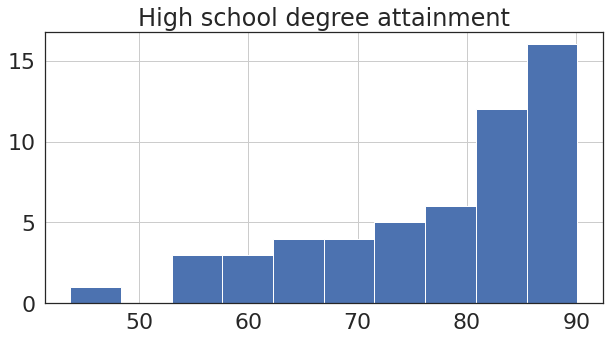

In [24]:
#Histogram of high school degree attainment
ed_pov.hist(column = "High school degree attainment")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8629ba27d0>]],
      dtype=object)

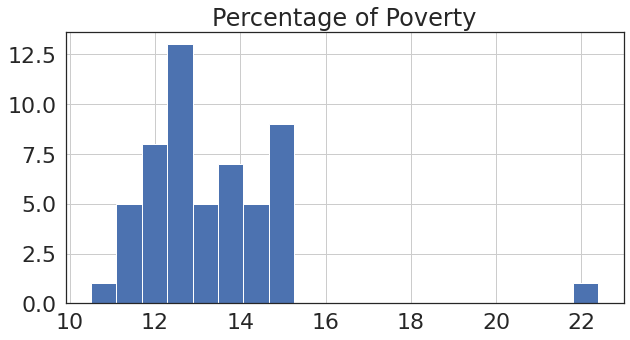

In [26]:
#Histogram of percentage of poverty
ed_pov.hist(column = "Percentage of Poverty", bins = 20)

We can tell from the distribution of percentage of poverty that there is an outlier in our merged dataset. Since the outlier would drastically affect the result of our analysis, the row with the outlier will be dropped.

In [27]:
ed_pov = ed_pov[ed_pov['Percentage of Poverty'] < 20]

Now we take a look at the histogram again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8629cf2350>]],
      dtype=object)

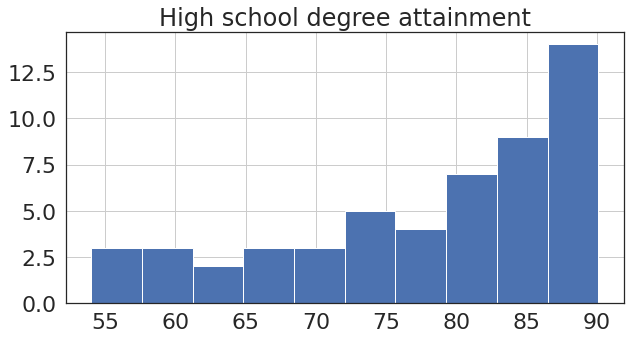

In [28]:
#Histogram of high school degree attainment
ed_pov.hist(column = "High school degree attainment")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8629a8be10>]],
      dtype=object)

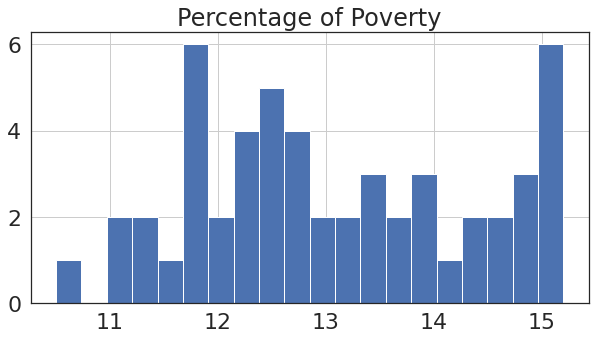

In [29]:
#Histogram of percentage of poverty
ed_pov.hist(column = "Percentage of Poverty", bins = 20)


In [27]:
#the dataset we will be using to perform inferential analysis on
ed_pov

,Year,High school degree attainment,Percentage of Poverty
0,2019,90.1,10.5
1,2018,89.8,11.8
2,2017,89.6,12.3
3,2017,89.6,12.3
4,2016,89.1,12.7
5,2015,88.4,13.5
6,2014,88.3,14.8
7,2013,88.2,14.8
8,2013,88.2,14.5
9,2012,87.6,15.0


Once the outliers are removed from each histogram, the resulting dataset is the one we will be using to perform inferential analysis on. To see if there is a correlation between the two factors, a scatter plot can be useful to visual the relationship between them. 

Text(0, 0.5, 'Percentage of Poverty')

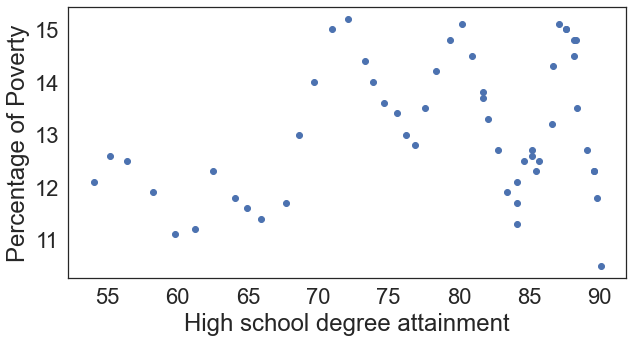

In [28]:
# Scatter plot of high school degree attainment and percentage of poverty
plt.scatter(x='High school degree attainment', y='Percentage of Poverty', data=ed_pov)
plt.xlabel('High school degree attainment')
plt.ylabel('Percentage of Poverty')


Here, we see that there seems to be a weak trend of a positive correlation between the two factors. The poverty percentage seems to fluctuate in this graph as well. Thus, to examine the correlation further, an inferential analysis will be carried out. 

## Inferential Analysis and Results 

To determine whether there is a correlation between the percentage of high school attainment and the poverty rate, we will first create a linear regression model using the Ordinary Least Square (OLS) estimation method. In this model, the predictor will be high school degree attainment and the outcome will be poverty percentage. By setting the predictors and the outcome variables this way, we will be examining the impact of educational attainment on poverty percentage. 


In [29]:
# y is the outomce and x is the predictor
y = ed_pov['Percentage of Poverty']
x = ed_pov['High school degree attainment']

#adds a constant to our model 
x = sm.add_constant(x)

#fit the model and show results
model = sm.OLS(y, x).fit() 
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Percentage of Poverty   R-squared:                       0.078
Model:                               OLS   Adj. R-squared:                  0.060
Method:                    Least Squares   F-statistic:                     4.320
Date:                   Wed, 17 Mar 2021   Prob (F-statistic):             0.0427
Time:                           23:54:05   Log-Likelihood:                -84.936
No. Observations:                     53   AIC:                             173.9
Df Residuals:                         51   BIC:                             177.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            10.4684      1.271      8.237      0.000       7.917      13.020
High school degree attainment     0.0336      0.016      2.079      0.043       0.001       0.066
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.203
Skew:                          -0.012   Prob(JB):                        0.548
Kurtosis:                       2.262   Cond. No.                         593.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results reveal several important points. First, the effect size is shown by Coef = 0.0336, indicating that when high school degree attainment increases by 1, the value of poverty percentage increases by 0.0336. Moreover, the constant indicates that when the educational attainment rate is 0, the baseline percentage of poverty is 10.4684. Through these values, we can create a linear regression line and evaluate how well it fits out data. 


___Poverty Percentage = 0.0336 * High school degree attainment + 10.4684___

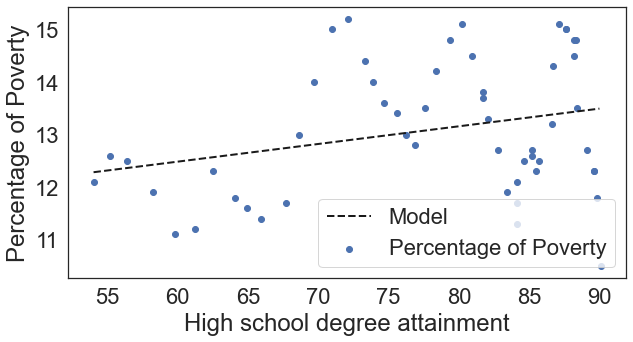

In [30]:
#create same scatter plot
plt.scatter(x='High school degree attainment', y='Percentage of Poverty', data=ed_pov)

#use the values derived from the linear regression model and plot it on the scatter plot 
xs = np.arange(ed_pov['High school degree attainment'].min(), ed_pov['High school degree attainment'].max())
ys = 0.0336 * xs + 10.4684
plt.plot(xs, ys, '--k', linewidth=2, label='Model')

#set lables and legend
plt.xlabel('High school degree attainment')
plt.ylabel('Percentage of Poverty');
plt.legend();


As we can see from the regression line, there is only a slight slope of the regression line. This indicates that the correlation between education attainment and poverty percentage does not have a strong relationship. However, it must be noted that we do see a positive correlation between them, where when one increases, so does the other. 

Another way to examine the degree of correlation between the two factors is by determining the Pearsons correlation. The closer the absolute value of the Pearson correlation is to 1, the stronger the correlation. 

In [31]:
#pearsonr to evaluate Pearson's correlation 
y = ed_pov['Percentage of Poverty']
x = ed_pov['High school degree attainment']
pearsonr(x, y)
print('Pearsons correlation coefficient = %.3f, (p=%.3f)' % (pearsonr(x, y)[0], pearsonr(x, y)[1]))


Pearsons correlation coefficient = 0.279, (p=0.043)


The Pearson correlation is 0.279 and the p-value is 0.043. The Pearson correlation is very small, implying that the correlation between education attainment and poverty percentage is weak. p-value <0.05 indicates that the probability to observe this correlation is statistically significant. 

The results of the analysis show that as educational attainment increases, so the poverty percentage. A positive correlation between the two factors is observed. However, the correlation is not strong since the effect size and the Pearson correlation are both very small. 

# Ethics & Privacy

   - Data Permission   
     
   The two datasets we used were web scraped off of the United States Census Bureau. It states that the content could be copied, modified, and redistributed. However, the site must be acknowledged as we linked all of the charts and data we scraped from the website. Unite States Census Bureau is also a public source of information on the Internet that is legal for use according to the copyleft licenses.  
       
       
   - Data Discrepancy and biases  
     
   The dataset is still limited to our question. For the first dataset, the data contained some other information and columns which are unrelated to our question. We cleaned the dataset to eliminate race, gender, different education degrees and only extract the data of what percentage of people 25 years and over who have completed high school or college. Our dataset does have some bias. There is a discrepancy between the ranges of the two data. The first data collects information from 1940 to 2019, and the second data is collected from 1959 to 2019. The lack of time period in the second data may discredit our research. 
    We do have the confidence to believe that the datasets we included in our research are less biased as they are all facts and census investigation results. However, we can only have an overview of these data as there may be individuals that were initially excluded from the census result. It may be biased from the lens of the government.  
    
         
   - Missing data  
        
   There are a few missing data for the first data set, that some information related to recent years are missing. Thus, the existence of missing data can exert some impact on the predictive trends. The politicians could make use of the data to support or go against certain political goals.      
          
          
   - Data Privacy  
     
   In terms of data privacy, every individual’s information is protected by the United States Census Bureau. The commitment applies to individuals, households, and businesses. It followed FOIA for its protected data. Therefore, the origin of our first dataset is pretty reliable.  
   
   
   - Implications:
   
   Since the results of our analysis demonstrated that as education attainment increases, so does the poverty rate. This does not mean that we are implying that in order to reduce poverty rates, the education attainment rate must also be reduced. Moreover, it does not mean that education has a negative effect. It must be noted that the implications of the results must be considered with caution. 

# Conclusion & Discussion

The Question of our research is to explore the correlation between the education level and the poverty rate in the United States. We started by trying to operationally define the term education level. We decided to use the high school attainment rate to define education level. After doing certain web research, we decided to use the datasets from the United States Census Bureau, which is official, confidential, and more precise with its protection of privacy. Therefore, we choose two datasets. One for exploring the percentage of high school attainments versus time and another is for examining the poverty rate versus years. Initially, we thought that there is a negative correlation between the education level and the poverty rate. The higher the education level is, the poverty rate seemed to decrease. However, once the data points were plotted, the results seem to be the opposite of what we had hypothesized. 
  

However, we need to confirm the relationship between education attainment and the poverty rate in a more concrete way. Thus, a linear regression test is carried out to figure out what is the impact value of education on poverty and the whether the correlation between the two factors is considered significantly strong. The results of the OLS regression model indicated that the impact value of education on poverty was significant, with a 0.0336% increase in poverty rate when the education rate increases by 1%. The regression line for the dataset was 
___Poverty Percentage = 0.0336 * High school degree attainment + 10.4684___. In order to examine the strength of the regression model, we analyzed the Pearson correlation, which was 0.279. This indicated that the positive correlation between the poverty rate and education is not particularly strong. 


Thus, with the analytical results in mind, we reject our hypothesis. This demonstrated that the poverty rate would ___not___ decrease in poverty rate if education attainment increased. The results of the analysis were shocking in comparison to the background research (and common intuition) that we had before carrying out the analysis. However, it must be noted that although the results indicated that there would be an increase in the poverty rate if the education rate increased, the strength of this correlation is weak and so is the effect size. 

  
It was important to note that there are certain limitations to our datasets. Specifically, the ideal number of observations is around 1000. However, it is theoretically impossible for us to gather more than 1000 observations. Also, there are many confounding variables that did not include in our initial research such as financial factors, political influence, or the stock market. We could not get a precise correlation between the education level and the poverty rate without excluding these confounding factors. We could only give an overview of this topic and anticipate future research and discussions. Another important idea that must be understood is that correlation does not equate to causation. There is simply a positive correlation observed, but it does not mean that one causes the other. 

Improvements could be made to our attempt at answering the question of whether education helps reduce poverty rates. Such improvements include the consideration of confounding elements such as the stock market and the overall economy of the United States during a specific year. Moreover, the range of the research could be narrowed down. For example, instead of looking at the United States as a whole, the datasets could be separated by states and the analysis will focus on the change in education attainment and the poverty percentage of the state from the 1940s to the 2020s. Another way of analysis could be used to examine this topic from another view as well. Instead of using a temporal analysis, we could carry out a more spatially focused one. An example would be to look at the individual education attainment and poverty rate at each state from 2019 and compare these data. 

# Team Contributions

- Shan Mo  
Background research, high school attendance data collection and cleaning, main data visualization and analysis, helped with conclusion and discussion
- Sherry Zeng  
Poverty rate data collection and cleaning, data analysis, content editing, conclusion and discussion editing.
- Tianqi Xia  
Ethics and Privacy editing, conclusion and discussion editing.
- Jingxi Chen  
Data visualization, EDA analysis